# 1.load the data

In [39]:
import numpy as np
import os
import cv2
import math

In [40]:
paths = {
    "IMAGES_PATH" : "./images/",
    "DATA_PATH" :  "./data/",
    "LIGHT_DIRECTIONS_PATH" : "./data/light_directions.txt",
    "LIGHT_INTENSITIES_PATH":"./data/light_intensities.txt",
    "FILENAMES_PATH" : "./data/filenames.txt",
    "NORMAL_PATH": "./data/normal.txt"
    
}




In [41]:
def load_light_sources():
    light_sources = np.loadtxt(paths["LIGHT_DIRECTIONS_PATH"])
    return light_sources

In [42]:
def load_intens_sources():
    light_sources = np.loadtxt(paths["LIGHT_INTENSITIES_PATH"])
    return light_sources

In [43]:
def load_objMask():
    mask_images = cv2.imread(paths["DATA_PATH"]+"mask.png",cv2.IMREAD_GRAYSCALE)
    img_np = np.asarray(mask_images)
    img_np[img_np  == 255] =1

    return img_np

In [44]:
a=load_light_sources()
print(a.shape)

(96, 3)


In [45]:
image2 = cv2.imread(paths["IMAGES_PATH"]+"001.png")
image_shape = image2.shape
h,w ,_ = image2.shape
print(image_shape)

(512, 612, 3)


In [46]:
intensities =  load_intens_sources()
print(intensities.shape)

(96, 3)


In [47]:
intensities[0][0]

1.3

In [65]:
def load_images():
    file_names = []
    intensities = load_intens_sources()
    image_number = 0
    #initialize image list
    all_images = np.zeros((96,h*w))
    with open(paths["FILENAMES_PATH"], "r") as f :
        file_names = f.readlines()
    # to remove "\n" from file_names
    file_names2 = [file_name.replace("\n","") for file_name in file_names]
    for image_name in file_names2:
        image = cv2.imread(paths["IMAGES_PATH"] + image_name, cv2.IMREAD_UNCHANGED)
        if image is None :
            print("image null")
        else :
            # a- cahnge the range of values (uint 16 ----> float32)
            image = image.astype(np.float32)
            range_16 = math.pow(2,16) - 1
            image_float = image/ range_16
            
            #b Divide each pixel on the intensity of the source (B/intB, G/intG, R/intR) 
            for channel in range(3): 
                image_float[:,:,channel] = image_float[:,:,channel]/intensities[image_number][channel]
            
            #c Convert images to grayscale (NVG = 0.3 * R + 0.59 * G + 0.11 * B)
            B, G, R = image_float[:,:,0] , image_float[:,:,1] , image_float[:,:,2]
            gray_img = 0.3 * R + 0.59 * G + 0.11 * B
            
            #d reshape image 
            image_reshaped = gray_img.reshape(1 , -1)
            print(image_reshaped)
            
            #add image to  
            all_images[image_number] = image_reshaped
        image_number = image_number +1
    return all_images        

In [66]:
images =load_images()

[[0.00151868 0.00172126 0.00162971 ... 0.00177678 0.00181808 0.00161022]]
[[0.00180597 0.00138351 0.00172669 ... 0.00247235 0.00228478 0.00233265]]
[[0.00163018 0.00158501 0.00168276 ... 0.00270705 0.00236701 0.00260822]]
[[0.00179213 0.00187404 0.00175117 ... 0.00310674 0.0028792  0.00284208]]
[[0.00169022 0.00166129 0.00153208 ... 0.00363044 0.00316372 0.00265361]]
[[0.00118198 0.00151203 0.00133629 ... 0.00290128 0.0026592  0.00245867]]
[[0.0012147  0.00100606 0.00097265 ... 0.00283431 0.00274875 0.00252042]]
[[0.00090809 0.00100685 0.00116603 ... 0.00276192 0.00229392 0.00225228]]
[[0.00165382 0.00128103 0.00133924 ... 0.00145566 0.00139745 0.00139745]]
[[0.00157389 0.00152432 0.00163519 ... 0.00193477 0.00197261 0.00158677]]
[[0.00165102 0.00160564 0.00160564 ... 0.00232871 0.00200404 0.00192924]]
[[0.00143823 0.00153849 0.00162742 ... 0.00249281 0.00227265 0.00205249]]
[[0.00150656 0.001272   0.00142418 ... 0.00249743 0.00222075 0.00207054]]
[[0.00120357 0.0010899  0.00096143 ...

In [67]:
print(images.shape)

(96, 313344)


# Calculation of normals 

From the first part, we have a matrix called image, each column represents the same pixel in different images
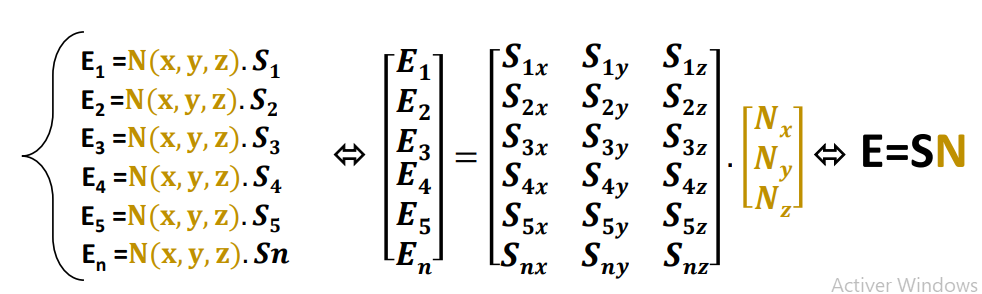


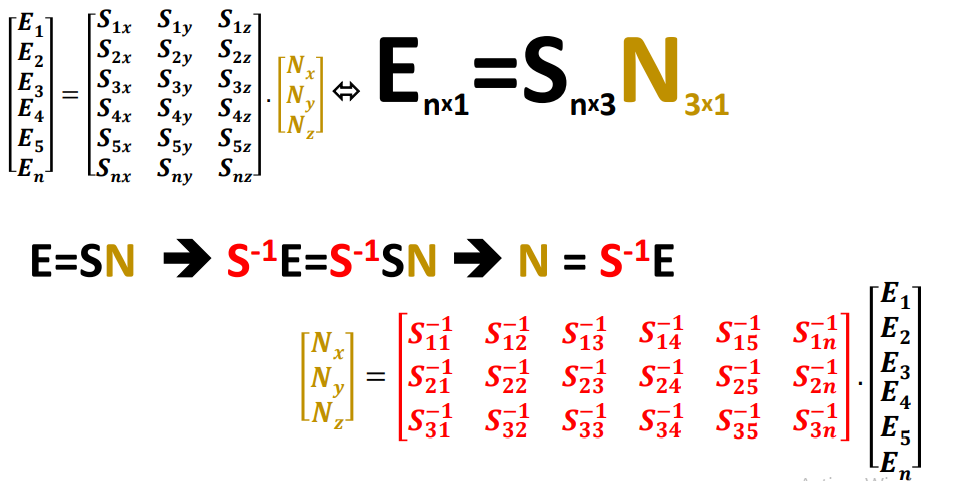

In [ ]:
def calcul_needle_map():
    #load objects from the first part
    obj_images = load_images()
    light_sources = load_light_sources()
    obj_masques = load_objMask()
    
    #initialize the vector norm
    norms = np.zeros((3,h*w))
    
    u,s,v = np.linalg.svd(light_sources)
    i=0
    # to iterate over the columns we just iterate over the transposed of your array:
    #norms (h,w,3) 
    for column in obj_images.T:
        n = s * column
        norms[i]
        i += 1
    return nomrs
        
    
    
    
